In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import re
import pandas as pd
import numpy as np

In [4]:
import sys
sys.path.append('../src/')
from glob import glob
replays = glob('../data/sc2replays/*')

In [28]:
from training import zerg_fighting_units, terran_fighting_units, protoss_fighting_units

In [5]:
from BO import UnitOrders

we get the units lost for each players, the build order of buildings and units and the attacks on opponent units. What are the most successful counter builds ?  

We can compute the proportion of survival of each type of units and the proportion of each type of units produced at each timpoints. The best coiunter is the type and quantity of opposing units for the least survival.

Select lost games and plot the opponent most produced unit survival against the most produced unit.

In [6]:
uo = UnitOrders(replays[:1000])
most_prod = uo.parse(best_counters=True)

In [7]:
most_prod.head()

,most_produced,n_produced,best_counter,counter_prod
0,Zergling,8,Stalker,5
1,Zealot,24,Immortal,2
2,Marine,85,Sentry,2
3,Zealot,90,Lurker,16
4,Reaper,1,Zergling,6


In [8]:
most_prod[most_prod.most_produced == 'Roach']

,most_produced,n_produced,best_counter,counter_prod
16,Roach,87,WarpPrism,1
46,Roach,46,WarpPrism,1
54,Roach,65,Queen,3
55,Roach,36,Queen,5
64,Roach,174,Corruptor,5
71,Roach,70,Ravager,3
74,Roach,43,Queen,3
79,Roach,45,Queen,3
84,Roach,170,Oracle,1
88,Roach,46,Phoenix,1


In [46]:
sns.set_style('darkgrid', {'axes.grid':True})


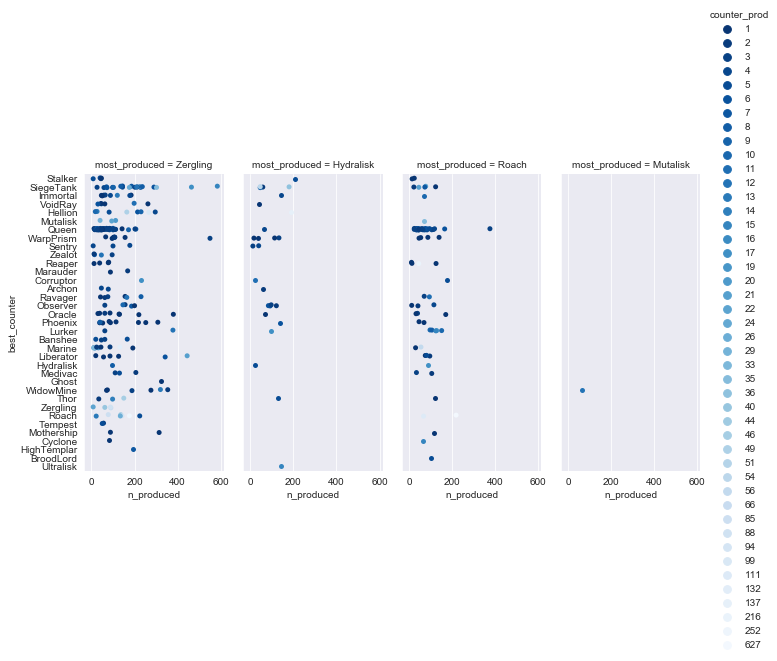

In [47]:
sns.catplot(y = 'best_counter', x='n_produced',col='most_produced', hue='counter_prod', col_wrap=4,
            data=most_prod[most_prod.most_produced.isin(zerg_fighting_units)], palette='Blues_r', aspect=0.5)
plt.show()

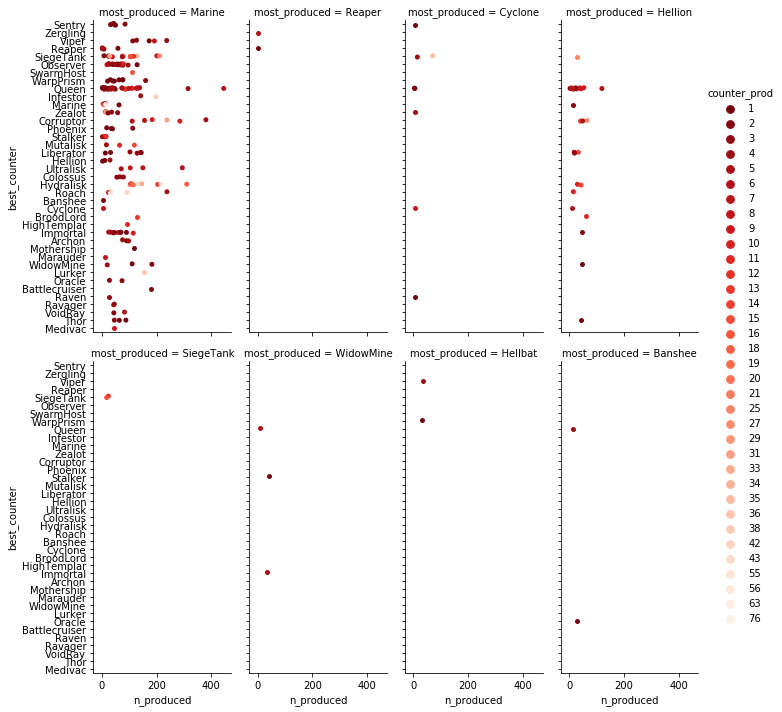

In [33]:
sns.catplot(y = 'best_counter', x='n_produced',col='most_produced', hue='counter_prod', col_wrap=4,
            data=most_prod[most_prod.most_produced.isin(terran_fighting_units)], palette='Reds_r', aspect=0.5)
plt.show()

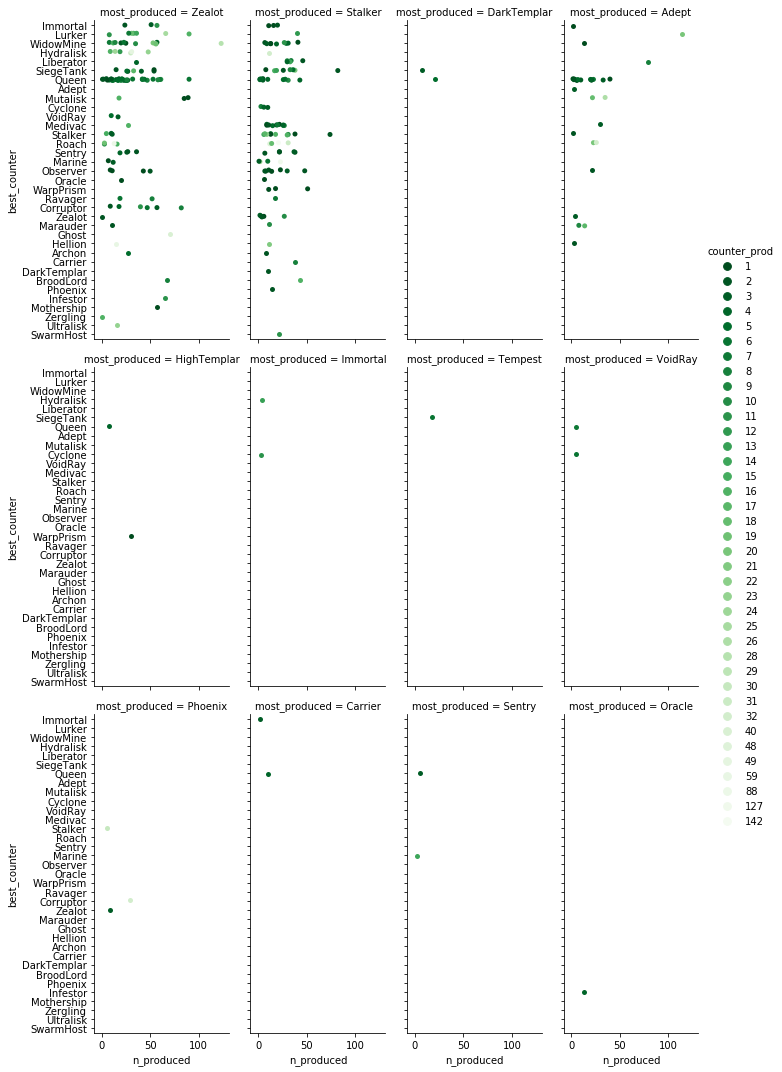

In [32]:
sns.catplot(y = 'best_counter', x='n_produced',col='most_produced', hue='counter_prod', col_wrap=4,
            data=most_prod[most_prod.most_produced.isin(protoss_fighting_units)], palette='Greens_r', aspect=0.5)
plt.show()